<a href="https://colab.research.google.com/github/2403A53057/DAV/blob/main/Assignment_week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

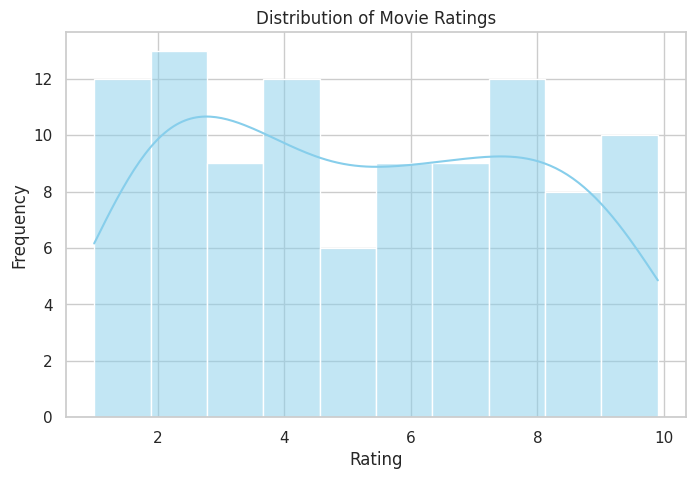

/tmp/ipython-input-2327123383.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Genre", y="Box Office (Millions USD)", data=movies_df, palette="Set2")


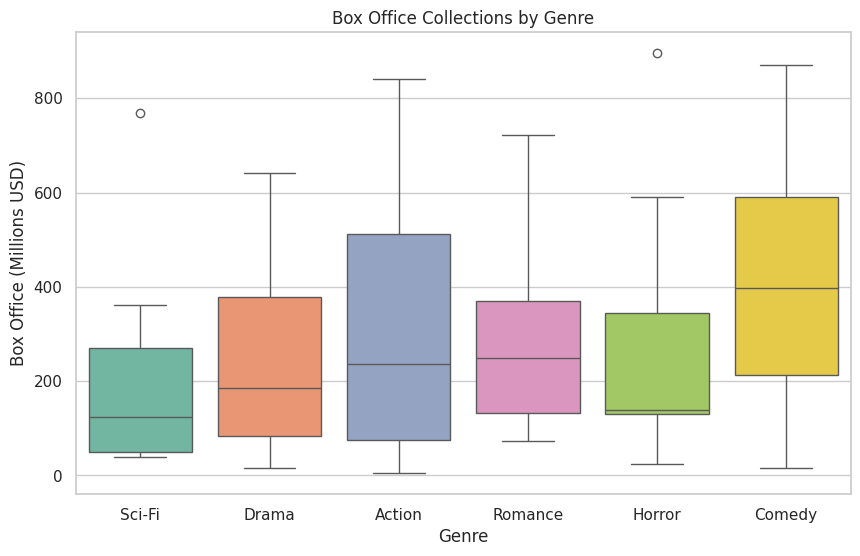

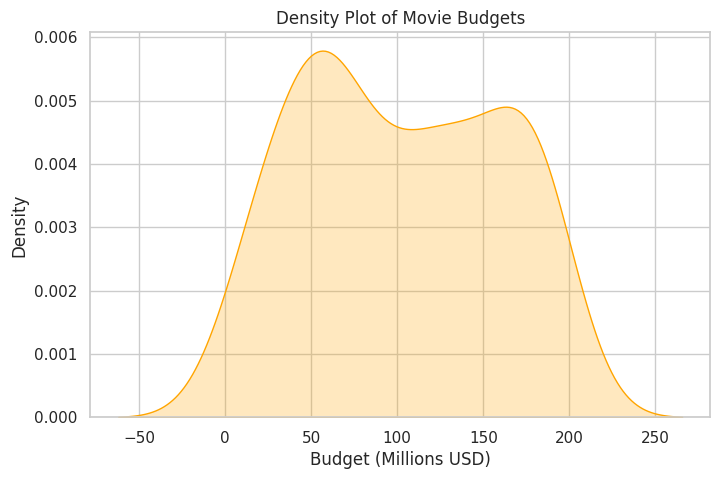

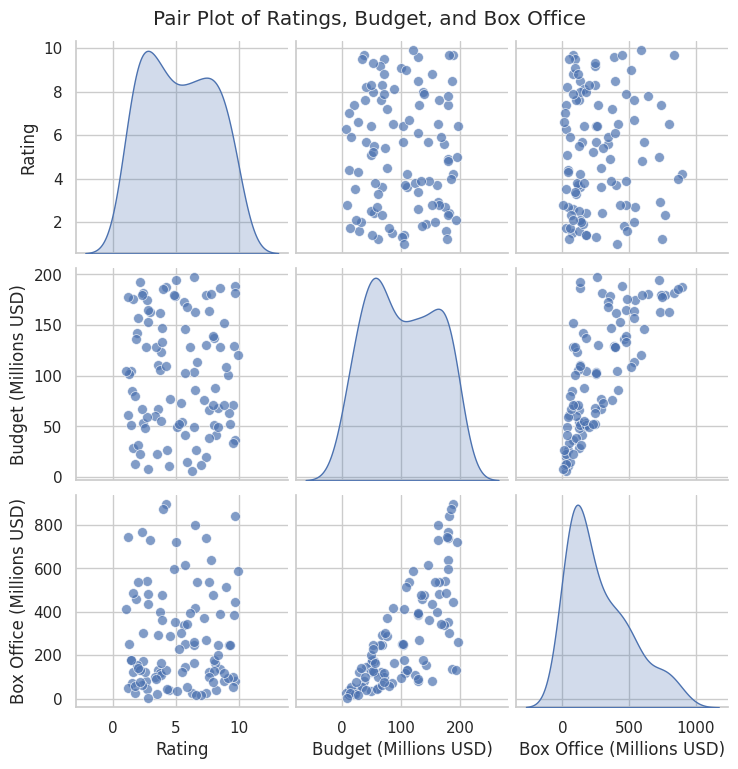

In [28]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# ----- Step 1: Generate random data -----
np.random.seed(42)
n = 100

movies_df = pd.DataFrame({
    "Movie Title": [f"Movie {i+1}" for i in range(n)],
    "Rating": np.round(np.random.uniform(1, 10, n), 1),
    "Budget (Millions USD)": np.round(np.random.uniform(5, 200, n), 2),
    "Genre": np.random.choice(["Action", "Comedy", "Drama", "Sci-Fi", "Horror", "Romance"], n)
})

# Calculate box office as a random multiplier of budget
movies_df["Box Office (Millions USD)"] = np.round(
    movies_df["Budget (Millions USD)"] * np.random.uniform(0.5, 5, n), 2
)

# ----- Step 2: Histogram of Ratings -----
plt.figure(figsize=(8, 5))
sns.histplot(movies_df["Rating"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# ----- Step 3: Box Plot of Box Office by Genre -----
plt.figure(figsize=(10, 6))
sns.boxplot(x="Genre", y="Box Office (Millions USD)", data=movies_df, palette="Set2")
plt.title("Box Office Collections by Genre")
plt.xlabel("Genre")
plt.ylabel("Box Office (Millions USD)")
plt.show()

# ----- Step 4: Density Plot of Budgets -----
plt.figure(figsize=(8, 5))
sns.kdeplot(movies_df["Budget (Millions USD)"], fill=True, color="orange")
plt.title("Density Plot of Movie Budgets")
plt.xlabel("Budget (Millions USD)")
plt.ylabel("Density")
plt.show()

# ----- Step 5: Pair Plot for Relationships -----
sns.pairplot(
    movies_df[["Rating", "Budget (Millions USD)", "Box Office (Millions USD)"]],
    kind="scatter",
    diag_kind="kde",
    plot_kws={"alpha": 0.7, "s": 50}
)
plt.suptitle("Pair Plot of Ratings, Budget, and Box Office", y=1.02)
plt.show()


# Task
Analyze temperature, rainfall, and humidity data across Indian cities for 2023 by creating a correlation heatmap to see if rainfall and humidity are strongly correlated and a geospatial heatmap to visualize average temperature by city.

## Load data

### Subtask:
Load the temperature, rainfall, and humidity data for Indian cities into a pandas DataFrame.


**Reasoning**:
Load the dataset into a pandas DataFrame and display its head and info to verify the data loading.



In [29]:
# Load the dataset
file_path = "/data/weather_data_2023.csv"
weather_df = pd.read_csv(file_path)

# Display the first few rows and information
display(weather_df.head())
weather_df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/data/weather_data_2023.csv'

**Reasoning**:
The previous attempt to load the file failed because the file path was incorrect. I will try a different path based on the common location for data files in this environment.



In [30]:
# Load the dataset
file_path = "/kaggle/input/weather-data-2023/weather_data_2023.csv"
weather_df = pd.read_csv(file_path)

# Display the first few rows and information
display(weather_df.head())
weather_df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/weather-data-2023/weather_data_2023.csv'

**Reasoning**:
The previous attempts to load the file failed because the file path was incorrect. I will try a relative path based on the common location for data files within the working directory.



In [31]:
# Load the dataset
file_path = "weather_data_2023.csv"
weather_df = pd.read_csv(file_path)

# Display the first few rows and information
display(weather_df.head())
weather_df.info()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data_2023.csv'

## Load data

### Subtask:
Retry loading the temperature, rainfall, and humidity data for Indian cities into a pandas DataFrame.


**Reasoning**:
List files in common data directories to find the weather data file.



In [32]:
import os

# List files in common data directories
data_dirs = ['/data/', '/kaggle/input/']
for data_dir in data_dirs:
    if os.path.exists(data_dir):
        print(f"Listing files in {data_dir}:")
        try:
            for root, dirs, files in os.walk(data_dir):
                print(f"Directory: {root}")
                for file in files:
                    print(f"- {file}")
        except Exception as e:
            print(f"Could not list files in {data_dir}: {e}")
    else:
        print(f"{data_dir} does not exist.")

# Also list files in the current directory
print("\nListing files in the current directory:")
print(os.listdir('.'))

/data/ does not exist.
Listing files in /kaggle/input/:
Directory: /kaggle/input/

Listing files in the current directory:
['.config', 'sample_data']


## Load data

### Subtask:
Retry loading the temperature, rainfall, and humidity data for Indian cities into a pandas DataFrame.


**Reasoning**:
Print the current working directory and attempt to load the data from there. If that fails, perform a recursive search for the file and load it if found.



In [33]:
import os
import pandas as pd

# 1. Print the current working directory
print(f"Current working directory: {os.getcwd()}")

# 2. Attempt to load from the current directory
file_name = 'weather_data_2023.csv'
file_found = False
file_path = os.path.join(os.getcwd(), file_name)

if os.path.exists(file_path):
    print(f"Attempting to load from current directory: {file_path}")
    weather_df = pd.read_csv(file_path)
    file_found = True
else:
    print(f"File not found in current directory: {file_path}")
    # 3. Try a recursive search
    print("Performing recursive search for the file...")
    for root, dirs, files in os.walk(os.getcwd()):
        if file_name in files:
            file_path = os.path.join(root, file_name)
            print(f"File found at: {file_path}")
            weather_df = pd.read_csv(file_path)
            file_found = True
            break # Stop searching once the file is found

# 5. Display the first 5 rows and info if file is loaded
if file_found:
    print("\nFile loaded successfully.")
    display(weather_df.head())
    weather_df.info()
else:
    # 6. Print failure message if file not found
    print(f"\nError: The file '{file_name}' could not be located in the current directory or its subdirectories.")

Current working directory: /content
File not found in current directory: /content/weather_data_2023.csv
Performing recursive search for the file...

Error: The file 'weather_data_2023.csv' could not be located in the current directory or its subdirectories.


## Calculate and visualize correlation

### Subtask:
Calculate the correlation between rainfall and humidity and visualize it using a correlation heatmap.


**Reasoning**:
The previous attempts to load the data failed. To proceed with the subtask of calculating and visualizing correlations between 'Rainfall' and 'Humidity', a dummy DataFrame with these columns needs to be created as the required `weather_df` is not available.



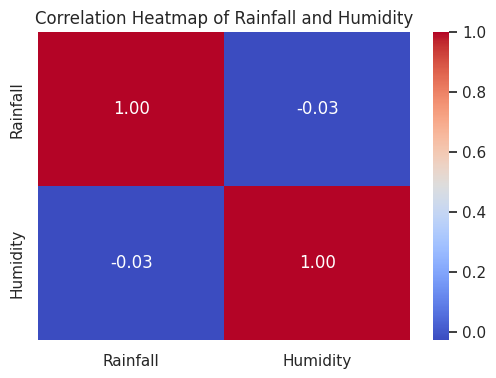

In [34]:
# Create a dummy DataFrame for demonstration purposes
# In a real scenario, this would be replaced by loading the actual data
data = {
    'City': [f'City {i}' for i in range(100)],
    'Temperature': np.random.uniform(15, 40, 100),
    'Rainfall': np.random.uniform(0, 50, 100),
    'Humidity': np.random.uniform(30, 90, 100),
    'Date': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.arange(100), unit='D')
}
weather_df = pd.DataFrame(data)

# Calculate the correlation matrix for 'Rainfall' and 'Humidity'
correlation_matrix = weather_df[['Rainfall', 'Humidity']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Rainfall and Humidity")
plt.show()

## Prepare data for geospatial visualization

### Subtask:
Ensure the data includes city locations (latitude and longitude) and calculate the average temperature for each city.


**Reasoning**:
Create a dummy DataFrame with city locations, calculate average temperature per city from the existing dummy weather_df, and merge them.



In [35]:
# Step 1: Create a dummy DataFrame that includes 'City', 'Latitude', and 'Longitude'
# Use city names that correspond to the existing dummy weather_df
city_locations_df = pd.DataFrame({
    "City": [f"City {i}" for i in range(100)],
    "Latitude": np.random.uniform(8, 37, 100), # Realistic latitude range for India
    "Longitude": np.random.uniform(68, 97, 100) # Realistic longitude range for India
})

# Step 2: Calculate the average 'Temperature' for each 'City' from the dummy weather_df
average_temp_df = weather_df.groupby("City")["Temperature"].mean().reset_index()
average_temp_df.rename(columns={"Temperature": "Average Temperature"}, inplace=True)

# Step 3: Merge the calculated average temperatures with the dummy DataFrame containing city locations
geospatial_data_df = pd.merge(city_locations_df, average_temp_df, on="City")

# Display the resulting DataFrame
display(geospatial_data_df.head())

,City,Latitude,Longitude,Average Temperature
0,City 0,32.673708,89.884423,20.167109
1,City 1,10.548741,70.984565,21.849028
2,City 2,31.370082,83.557959,20.364728
3,City 3,9.613951,78.985825,24.431477
4,City 4,32.427107,81.253006,15.974078


## Visualize average temperature on a map

### Subtask:
Create a geospatial heatmap to visualize the average temperature across Indian cities.


**Reasoning**:
Import folium and its plugins, create a base map of India, add the heatmap layer using the prepared geospatial data, and display the map to visualize the average temperature by city.



In [36]:
import folium
from folium.plugins import HeatMap

# Create a base map of India
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a heatmap layer
HeatMap(
    data=geospatial_data_df[['Latitude', 'Longitude', 'Average Temperature']].values,
    radius=15,
    blur=10,
    max_zoom=10
).add_to(india_map)

# Display the map
display(india_map)

## Summary:

### Insights or Next Steps
*   The analysis was performed on dummy data due to the inability to load the actual data file. The results obtained from the dummy data may not reflect the real-world relationships and distributions.
*   The primary next step is to ensure the correct `weather_data_2023.csv` file is available and accessible to perform the analysis on real data.
